<a href="https://colab.research.google.com/github/D-extreme/Medical-Imaging/blob/main/Medical_Imaging_Playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Guidelines for execution.

Kindly, go through the below guidelines for smooth exeuction of the notebook.

1.   Create a directory in Google Drive named as Medical Imaging 
2.   Add the xray_images.zip file and the CT_Skull_Slice.jpg in the folder
3. Unarchive the xray_images.zip
4. Run the following Cells

In [ ]:
cd '/content/drive/My Drive/Medical Imaging'

/content/drive/My Drive/Medical Imaging


# Medical Imaging Assignment 

>## <font color='dodgerblue'>1. Gamma Correction 

**Aim:** To perform Gamma correction on a given
image. The inputs to your function should be (i) input-image and (ii) Gamma value. The output of the
function should be the Gamma -corrected image. 

Results Can be seen alongside the executed code

>>### Code

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def GammaCorrection(im,gamma):
  return im**gamma

In [ ]:
im1 = plt.imread('/content/drive/MyDrive/Medical Imaging/xray01.png')
print(np.shape(im1))
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

(1024, 1024)


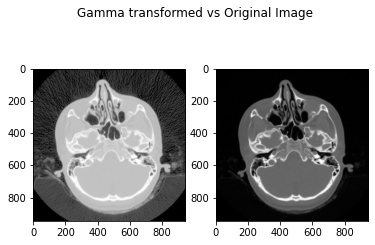

In [ ]:
image = plt.imread('/content/drive/MyDrive/Medical Imaging/CT_Skull_Slice.jpg')
im_gamma = GammaCorrection(image, 0.3)
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Gamma transformed vs Original Image')
ax1.imshow(im_gamma, cmap='gray')
ax2.imshow(image,cmap='gray')

Plotting the Gamma transformations for images in xray_images.zip

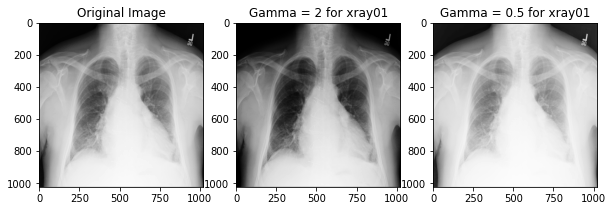

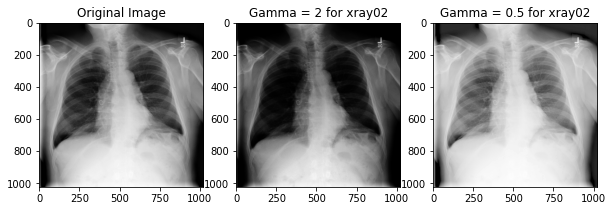

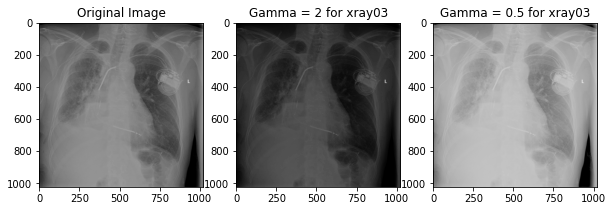

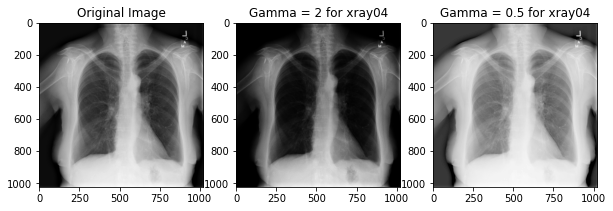

In [ ]:
for i in range(1,5):
  filename = '/content/drive/MyDrive/Medical Imaging/' + 'xray0' + str(i) + '.png'
  im = plt.imread(filename)
  im_gamma_high = GammaCorrection(im, 2)
  im_gamma_low = GammaCorrection(im,0.5)
  fig, (ax1,ax2,ax3) = plt.subplots(nrows =1,ncols =3, figsize=(10,10))
  ax1.set_title('Original Image')
  ax1.imshow(im, cmap='gray')
  title = "Gamma = 2 for xray0" + str(i)
  ax2.set_title(title)
  ax2.imshow(im_gamma_high, cmap='gray')
  title2 = "Gamma = 0.5 for xray0" + str(i)
  ax3.set_title(title2)
  ax3.imshow(im_gamma_low, cmap="gray")

>>### Inferences

Gamma correction basically scales/ amplifies intensity in a given region based on the Gamma values. Thus, a Gamma correction of greater than one gives an output image which amplifies high intensity regions and supresses Low intensity region. Similarly, a Gamma correction of less than one gives an output image which amplifies intensities in the lower intensity region and supresses intensities in the higher intensity region

The formula for Gamma transformation is given by: $ s = t^γ$

>## <font color='dodgerblue'>2. Histogram Equalization

**Aim** : To perform global
histogram equalization of an image. Apply it to all four images

>>### Code

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import plotly
import tensorflow as tf

In [ ]:
def histogram_equalization(image):
  arr = image.flatten()
  bins = 256

  # Getting the cumulative histogram
  n, bins, patches = plt.hist(arr, bins, cumulative=True)
  plt.close()

  # Normalizing the historgram
  n_normalized = n*(1/np.size(image))

  # Getting the transformed histogram after equalization
  n_final = n_normalized*(len(bins) -1)
  transformation = np.floor(n_final)
  transformation.astype(np.uint8)

  # Mapping the equalized histogram values back in the array
  if(tf.test.gpu_device_name() == '/device:GPU:0'):
    temp = np.copy(image)
    trans_image = np.zeros(np.shape(image))
    for i in range(len(temp)):
      for j in range(len(temp[i])):
          trans_image[i][j] = transformation[image[i][j]]

  return trans_image

In [ ]:
image = plt.imread('/content/drive/MyDrive/Medical Imaging/CT_Skull_Slice.jpg')

In [ ]:
trans_image = histogram_equalization(image)

Text(0.5, 1.0, 'Original Image')

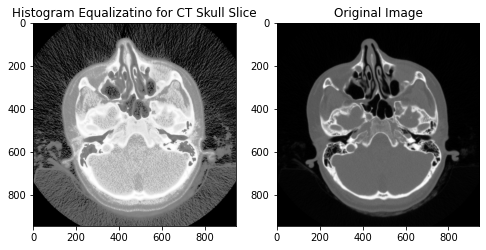

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (8,8))
ax1.imshow(trans_image, cmap='gray')
ax1.set_title('Histogram Equalizatino for CT Skull Slice')
ax2.imshow(image, cmap='gray')
ax2.set_title('Original Image')

In [ ]:
im1 = plt.imread('/content/drive/MyDrive/Medical Imaging/xray01.png')
im2 = plt.imread('/content/drive/MyDrive/Medical Imaging/xray02.png')
im3 = plt.imread('/content/drive/MyDrive/Medical Imaging/xray03.png')
im4 = plt.imread('/content/drive/MyDrive/Medical Imaging/xray04.png')

In [ ]:
# Takes time toto run

trans_image1 = histogram_equalization((255.0*im1).astype(np.uint8))
print('1')
trans_image2 = histogram_equalization((255.0*im2).astype(np.uint8))
print('2')
trans_image3 = histogram_equalization((255.0*im3).astype(np.uint8))
print('3')
trans_image4 = histogram_equalization((255.0*im4).astype(np.uint8))
print('4')

1
2
3
4


Text(0.5, 1.0, 'Equalized Image')

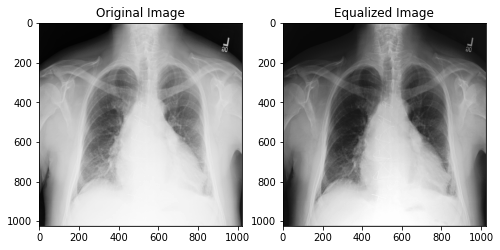

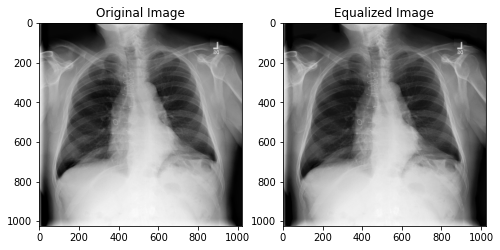

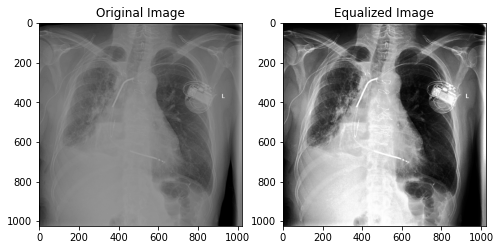

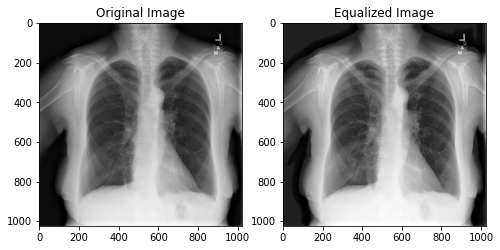

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (8,8))
ax1.imshow(im1, cmap='gray')
ax1.set_title('Original Image')
ax2.imshow(trans_image1, cmap='gray')
ax2.set_title('Equalized Image')

fig, (ax1,ax2) = plt.subplots(1,2, figsize = (8,8))
ax1.imshow(im2, cmap='gray')
ax1.set_title('Original Image')
ax2.imshow(trans_image2, cmap='gray')
ax2.set_title('Equalized Image')

fig, (ax1,ax2) = plt.subplots(1,2, figsize = (8,8))
ax1.imshow(im3, cmap='gray')
ax1.set_title('Original Image')
ax2.imshow(trans_image3, cmap='gray')
ax2.set_title('Equalized Image')

fig, (ax1,ax2) = plt.subplots(1,2, figsize = (8,8))
ax1.imshow(im4, cmap='gray')
ax1.set_title('Original Image')
ax2.imshow(trans_image4, cmap='gray')
ax2.set_title('Equalized Image')

>>### Inferences

After histogram equalization the contrast in the image was equally ditributed globally over the entire image. This led to averaging of the histogram of pixel intensities in the image. Sometimes even after histogram equalization, there might be some overshoot of a particular intensity in the output image to reolve that we do **Contrast Limited Histogram Equalization** which thresholds the maximum number of pixels allocated to a given intensity. The number of pixels that overshoot are equally distributed among all the freqeuncies until the overshoot is resolved. 

Another method to better enhance the images is by Adaptive (Local) Histogram Equalization.

>## <font color='dodgerblue'>3. Adaptive (Local) Histogram Equalization

**Aim** : To perform sliding window adaptive (local) histogram equalization. For each of the four images, play with
varying window sizes, and only present results for that window size that looks visually better.

>>### Code

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import plotly
import tensorflow as tf
from skimage import data
from skimage.util.dtype import dtype_range
from skimage.util import img_as_ubyte
from skimage import exposure
from skimage.morphology import disk
from skimage.morphology import ball
from skimage.filters import rank

In [ ]:
def histogram_equalization(image):
  arr = image.flatten()
  bins = 256

  # Getting the cumulative histogram
  n, bins, patches = plt.hist(arr, bins, cumulative=True)
  plt.close()

  # Normalizing the historgram
  n_normalized = n*(1/np.size(image))

  # Getting the transformed histogram after equalization
  n_final = n_normalized*(len(bins) -1)
  transformation = np.floor(n_final)
  transformation.astype(np.uint8)

  # Mapping the equalized histogram values back in the array
  if(tf.test.gpu_device_name() == '/device:GPU:0'):
    temp = np.copy(image)
    trans_image = np.zeros(np.shape(image))
    for i in range(len(temp)):
      for j in range(len(temp[i])):
          trans_image[i][j] = transformation[image[i][j]]

  return trans_image

In [ ]:
# This code is very exhausive in nature and uses all of the GPU memory

def adaptive_histogram_equalization(image, window):
  shape = np.shape(image)
  temp = np.zeros(shape)
  for i in range(int(window/2), shape[0] - int(window/2)):
    for j in range(int(window/2), shape[1] - int(window/2)):
      m1 = i;
      m2 = j;
      j1 = image[i-int(window/2):i+int(window/2),j-int(window/2):j + int(window/2)];
      j2 = histogram_equalization(j1);
      temp[i,j] = j2[int(window/2),int(window/2)];
      j=j+1;
    i = i+1;
  return temp


/usr/local/lib/python3.6/dist-packages/skimage/filters/rank/generic.py:119: UserWarning:

Possible precision loss converting image of type float32 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.



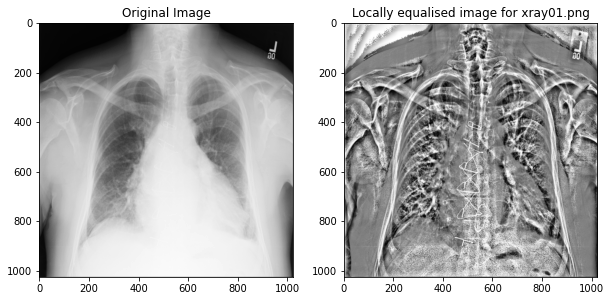

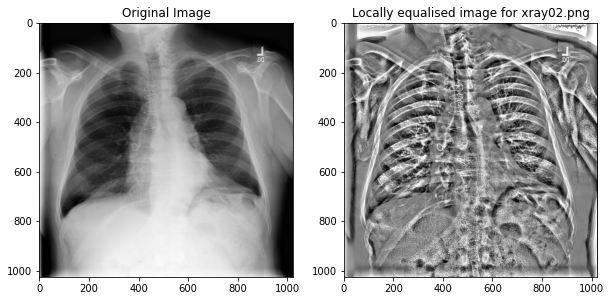

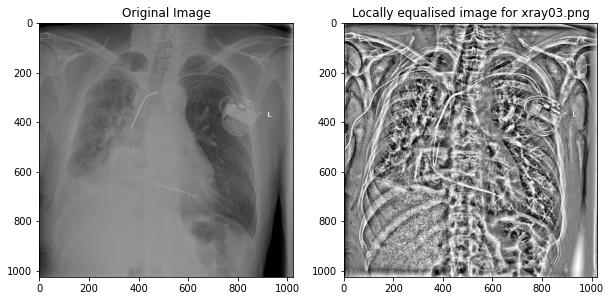

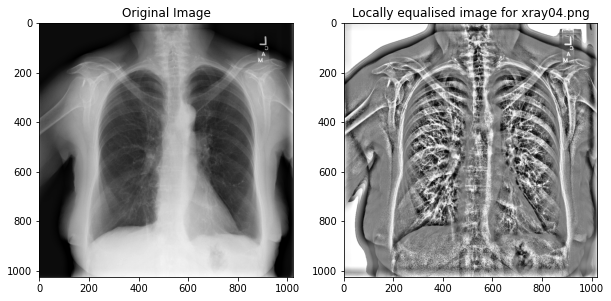

In [ ]:
selem = disk(30)
for i in range(1,5):
  filename = '/content/drive/MyDrive/Medical Imaging/' + 'xray0' + str(i) + '.png'
  im = plt.imread(filename)
  img_eq = rank.equalize(np.array(im), selem=selem)
  fig, (ax1,ax2) = plt.subplots(nrows =1,ncols =2, figsize=(10,10))
  ax1.set_title('Original Image')
  ax1.imshow(im, cmap='gray')
  title = "Locally equalised image for xray0" + str(i) + ".png"
  ax2.set_title(title)
  ax2.imshow(img_eq, cmap='gray')

In [ ]:
CT_image = plt.imread('/content/drive/MyDrive/Medical Imaging/CT_Skull_Slice.jpg')

In [ ]:
img_eq = rank.equalize(np.array(CT_image), selem=selem)

Text(0.5, 1.0, 'Original Image')

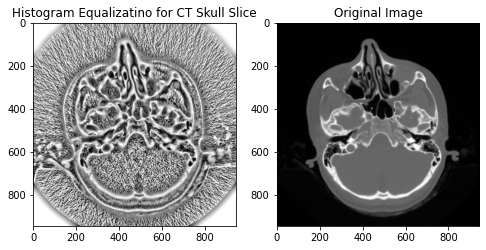

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (8,8))
ax1.imshow(img_eq, cmap='gray')
ax1.set_title('Histogram Equalizatino for CT Skull Slice')
ax2.imshow(CT_image, cmap='gray')
ax2.set_title('Original Image')

>>### Inferences

After Local histogram equalization since the enhancement is local to a particular region in the image. The enhancement is much better due to equitable distribution of intensities locally over the entire intensity specturm.

In Local Histogram Equalization, we fix a window size typically 1/8th of the image and perform equalization for the window only the final images is generated by sliding the window all across the image.

>## <font color='dodgerblue'>4. Edge Detection



>>### <font color='gold'>a) Sobel Edge Detection



**Aim** : Specify the Sobel masks for finding out the horizontal gradients (𝐺𝑥) and vertical gradients (𝐺𝑦) in a given image. Apply these masks to the given input image and compute 𝐺𝑥 and 𝐺𝑦. Compute the magnitude of the gradient 𝐺 from 𝐺𝑥 and 𝐺𝑦.Display 𝐺𝑥, 𝐺𝑦 and 𝐺 for the given image.

>>>#### Code

In [ ]:
Gauss = (1/16)*(np.array([[1,2,1],[2,4,2],[1,2,1]]).astype(np.float))

In [ ]:
# Sobel Edge Detection
import scipy.signal as sig
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

image = plt.imread('/content/drive/MyDrive/Medical Imaging/CT_Skull_Slice.jpg')

def SobelFiltering(image):
  # Sobel Filters in X and Y
  Sx = [[1,0,-1],[2,0,-2],[1,0,-1]]
  Sy = [[1,2,1],[0,0,0],[-1,-2,-1]]

  # Gaussian Filter
  Gauss = (1/16)*(np.array([[1,2,1],[2,4,2],[1,2,1]]).astype(np.float))

  # Gaussian Filter convolved with Sobel Filters
  Gx = sig.convolve2d(Gauss, Sx, mode='full')
  Gy = sig.convolve2d(Gauss, Sy, mode='full')

  if(tf.test.gpu_device_name() == '/device:GPU:0'):
    grad_x = sig.convolve2d(image, Gx, mode='same')
    grad_y = sig.convolve2d(image, Gy, mode='same')
    grad = grad = np.sqrt(grad_x **2  + grad_y **2)
  
  return grad, grad_x, grad_y


Text(0.5, 1.0, 'Grad_Y')

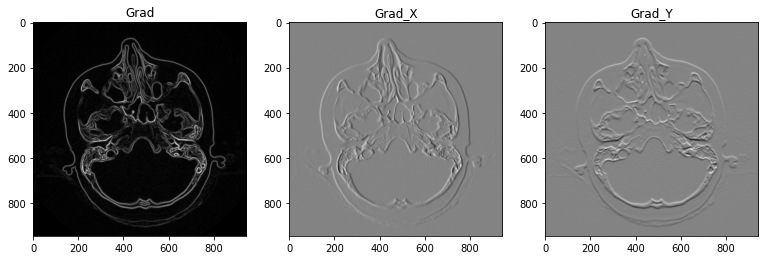

In [ ]:
# Displaying the Gradients for the test image using Matplotlib
grad, grad_x, grad_y = SobelFiltering(image)
grad_array = [grad_x, grad_y, grad]
arr = ['Grad_X', 'Grad_Y', 'Grad']
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.set_figheight(13)
fig.set_figwidth(13)
ax1.imshow(grad, cmap='gray')
ax1.set_title('Grad')
ax2.imshow(grad_x, cmap = 'gray')
ax2.set_title('Grad_X')
ax3.imshow(grad_y, cmap='gray')
ax3.set_title('Grad_Y')

Plotting the Gradients for the images in xray_images.zip

<Figure size 432x288 with 0 Axes>

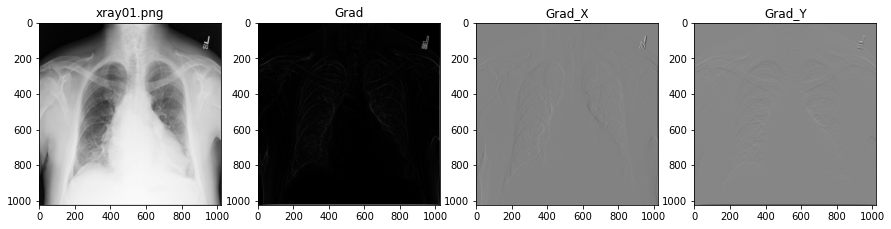

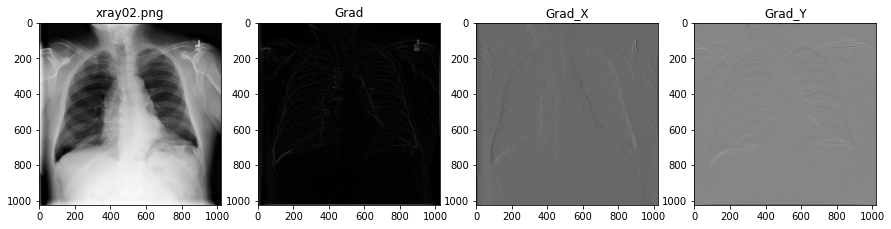

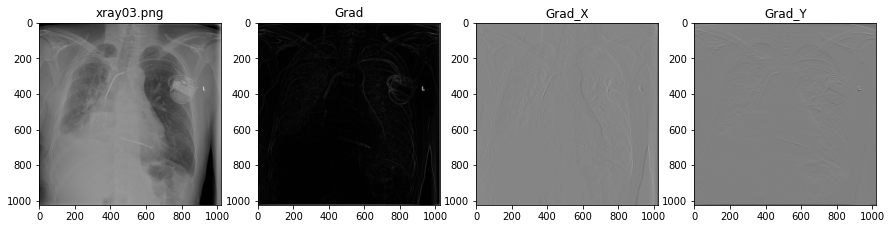

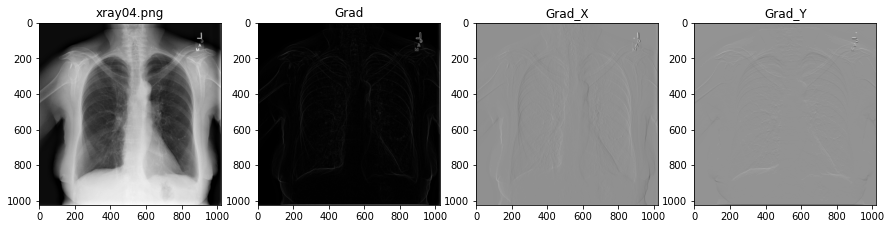

In [ ]:
for i in range(1,5):
  filename = '/content/drive/MyDrive/Medical Imaging/' + 'xray0' + str(i) + '.png'
  im = plt.imread(filename)
  grad, grad_x, grad_y = SobelFiltering((255.0*im).astype(np.uint8))
  plt.figure(i)
  fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4)
  fig.set_figheight(15)
  fig.set_figwidth(15)
  title = 'xray0' + str(i) + '.png'
  ax1.imshow(im, cmap='gray')
  ax1.set_title(title)
  ax2.imshow(grad, cmap='gray')
  ax2.set_title('Grad')
  ax3.imshow(grad_x, cmap='gray')
  ax3.set_title('Grad_X')
  ax4.imshow(grad_y, cmap='gray')
  ax4.set_title('Grad_Y')

>>>#### Inferences

Sobel Filtering and Laplacian filtering are used for detecting and amplifying edges in an images. The sobel filtering has an inherent smoothing withing it does it is less likely to amplify gaussian noise.



>>### <font color='gold'>b) Laplacian-based Edge Detection



Aim: Specify the kernel for a 45° isotropic Laplacian mask.
Apply it to the given input image and display the results.

$45^o$ isotropic laplacian mask

>$L =
 \begin{pmatrix}
  1 & 1 & 1 \\
  1 & -8 & 1 \\
  1 & 1 & 1
 \end{pmatrix}$

>>>#### Code

Text(0.5, 1.0, 'Original Image')

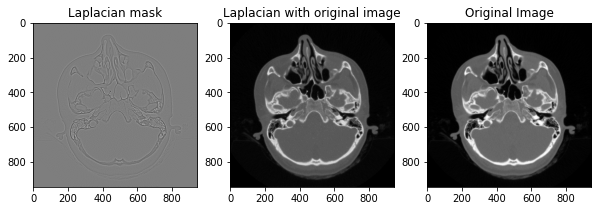

In [ ]:
import scipy.signal as sig
import numpy as np
import matplotlib.pyplot as plt

image = plt.imread('/content/drive/MyDrive/Medical Imaging/CT_Skull_Slice.jpg')

# Using 90 degree isotropic Laplacian Mask
def Laplacian(image):
  #kernel for a 45 degree isotropic laplacian mask
  laplacian = [[1,1,1],[1,-8,1],[1,1,1]]
  final_image = image + np.abs(sig.convolve2d(image,laplacian, mode='same'))
  return final_image, sig.convolve2d(image,laplacian, mode='same')

final_image, mask = Laplacian(image)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (10,10))
ax1.imshow(mask, cmap='gray')
ax1.set_title('Laplacian mask')
ax2.imshow(final_image, cmap = 'gray')
ax2.set_title('Laplacian with original image')
ax3.imshow(image, cmap='gray')
ax3.set_title('Original Image')

# plt.imshow(final_image, cmap='gray')
# plt.title('Image generated by taking 90 Degree isotropic Laplacian of CT_Skull_slice.jpg')

Plotting Laplacians for images in xray_images.zip

<Figure size 432x288 with 0 Axes>

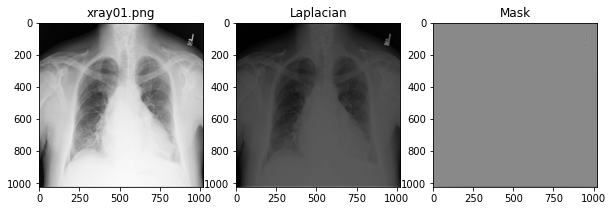

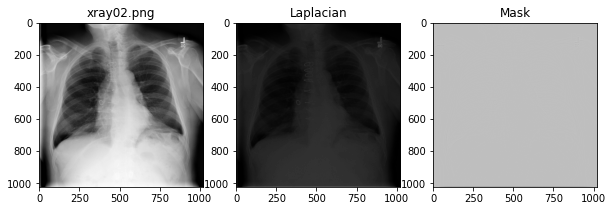

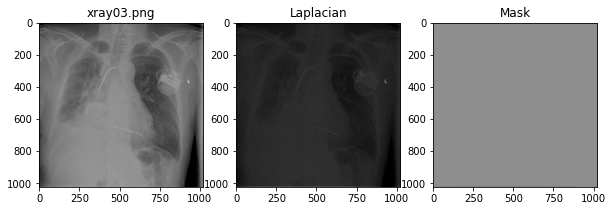

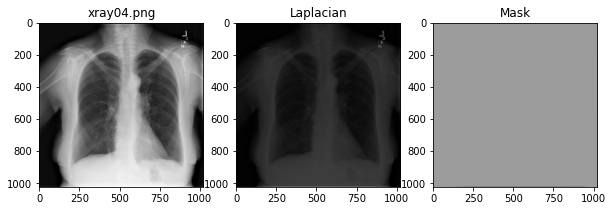

In [ ]:
for i in range(1,5):
  filename = '/content/drive/MyDrive/Medical Imaging/' + 'xray0' + str(i) + '.png'
  im = plt.imread(filename)
  laplacian,mask = Laplacian(im)
  plt.figure(i)
  fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (10,10))
  title = 'xray0' + str(i) + '.png'
  ax1.imshow(im, cmap='gray')
  ax1.set_title(title)
  ax2.imshow(laplacian, cmap='gray')
  ax2.set_title('Laplacian')
  ax3.imshow(mask, cmap='gray')
  ax3.set_title('Mask')

>>>#### Inferences

The output image obtained after adding/subtracting the Laplacian from the original images seems to have amplified the noise as well. To get rid of this noise, we can use the smoothed sobel as a mask and the en convolve it with the final image obtained after laplacian.



>>### <font color='gold'>c) Comparing Results and specifying inferences

The resutls obtained in (a) and (b) could be compared on the basis of amplification of noise. It can be seen that the noise is getting amplified in the Laplacian Operation and not in the Sobel Based Edge detection due to the inherent Gaussian Smoothing present in the Sobel Edge Detection



>## <font color='dodgerblue'> Frequency Domain Filtering

>>### <font color='gold'> a) Adding Gaussian Noise of mean 0 and standard deviation of 0.01</font>

In [ ]:
from random import gauss
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab

# Creating the Noise Function
def GaussianNoise(dim_y, dim_x, mean, std):
  gaussian_noise = []
  for i in range(dim_y):
    arr = []
    for j in range(dim_x):
      value = gauss(mean,std)
      arr.append(255.0*value)
    gaussian_noise.append(arr)

  return gaussian_noise


Getting the noisy image from CT_Skull_Slice.jpg

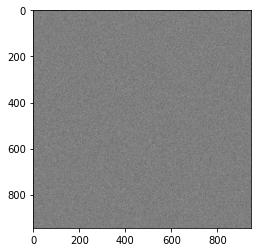

In [ ]:
ct = plt.imread('/content/drive/MyDrive/Medical Imaging/CT_Skull_Slice.jpg')
plt.imshow(GaussianNoise(np.shape(ct)[0], np.shape(ct)[1], 0, 0.01), cmap='gray')

In [ ]:
ct = plt.imread('/content/drive/MyDrive/Medical Imaging/CT_Skull_Slice.jpg')
final_ct_image = ct + GaussianNoise(np.shape(ct)[0], np.shape(ct)[1], 0, 0.01)

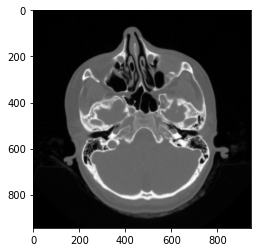

In [ ]:
plt.imshow(ct, cmap='gray')

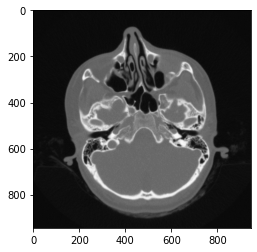

In [ ]:
plt.imshow(final_ct_image, cmap='gray')

Adding Gaussian Noise to all the images in xray_images.zip

In [ ]:
noisy_images = []
for i in range(1,5):
  filename = '/content/drive/MyDrive/Medical Imaging/' + 'xray0' + str(i) + '.png'
  im = plt.imread(filename)
  shape = np.shape(im)
  gaussian_noise = GaussianNoise(shape[0], shape[1], mean=0, std= 0.01)
  final_image = im + gaussian_noise
  noisy_images.append(final_image)

The array `noisy_images` and `final_ct_image` contain the Gaussian Noised Images

>>### <font color='gold'> b) Computing NxN point DFT of the noisy image</font>

In [ ]:
fft_ct_image = np.fft.fft2(final_ct_image)
fftshift_ct_image = np.fft.fftshift(fft_ct_image)

In [ ]:
np.unique(np.abs(fftshift_ct_image))

array([6.16976168e+00, 6.16976168e+00, 6.85551932e+00, ...,
       2.01672887e+07, 2.01672887e+07, 4.44874072e+07])

Text(0.5, 1.0, 'Magnitude of Frequency response')

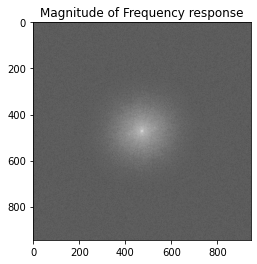

In [ ]:
plt.imshow(20*np.log(np.abs(fftshift_ct_image)), cmap='gray')
plt.title('Magnitude of Frequency response')

>>### <font color='gold'> c) Applying a low pass filter on the magnitude spectrum computed in part-b. The low-pass filter is a circular filter of radius 15 with values of 1 inside and 0 outside.</font>

>>>### Code

Function for circular filter

In [ ]:
# Creating the circular filter
def circular_filter(radius,dim):
  filt = np.zeros((dim,dim));
  for i in range(0,dim):
    for j in range(0,dim):
      if((i - int(dim/2))*(i - int(dim/2)) + (j - int(dim/2))*(j - int(dim/2)) <= radius*radius):
        filt[i][j] = 1;
  return filt


In [ ]:
circ_filt1 = circular_filter(15,945)
circ_filt2 = circular_filter(50,945)

Text(0.5, 1.0, 'circular filter with radius 30')

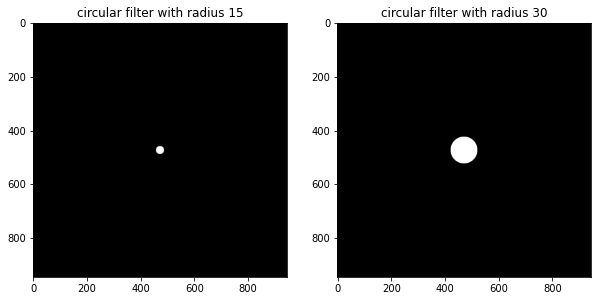

In [ ]:
fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols =2, figsize = (10,10))
ax1.imshow(circ_filt1, cmap='gray')
ax1.set_title('circular filter with radius 15')
ax2.imshow(circ_filt2, cmap='gray')
ax2.set_title('circular filter with radius 30')


Performing frequecy domain filtering

In [ ]:
# Product of the two images will give the filtered output
filtered_spectrum1 = (circ_filt1*np.fft.fftshift(fft_ct_image))
filtered_spectrum2 = (circ_filt2*np.fft.fftshift(fft_ct_image))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Filtered Spectrum with filter radius 30')

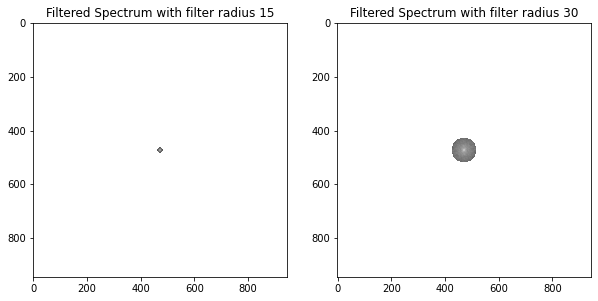

In [ ]:
fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols =2, figsize = (10,10))
ax1.imshow(20*np.log(np.abs(filtered_spectrum1)), cmap='gray')
ax1.set_title('Filtered Spectrum with filter radius 15')
ax2.imshow(20*np.log(np.abs(filtered_spectrum2)), cmap='gray')
ax2.set_title('Filtered Spectrum with filter radius 30')

In [ ]:
ifft_ct_image_lp1 = np.fft.ifft2(np.fft.ifftshift(filtered_spectrum1))
ifft_ct_image_lp2 = np.fft.ifft2(np.fft.ifftshift(filtered_spectrum2))

Text(0.5, 1.0, 'Image after filtering with filter radius 30')

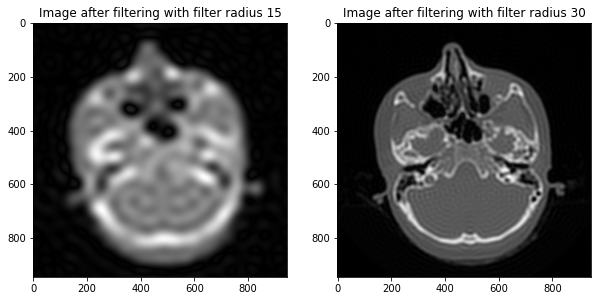

In [ ]:
fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols =2, figsize = (10,10))
ax1.imshow(np.abs(ifft_ct_image_lp1), cmap='gray')
ax1.set_title('Image after filtering with filter radius 15')
ax2.imshow(np.abs(ifft_ct_image_lp2), cmap='gray')
ax2.set_title('Image after filtering with filter radius 30')

>>>### Inferences

The inferences we can obtain from here are:


*   Filtering the image with a circular low pass filter in frequecy domain is like convolving it with a sinc like function in time domain which is averaging the image as we can see.
*  With increase in the filter radius, the retainment of high frequecy components is more and since the sharp features are represented by high frequecy components we are getting a comparatively sharper image
* The appropriate size for the inverse DFT should be NxN to get the original image back

>>### <font color='gold'> d) Applying a high pass filter on the magnitude spectrum computed in part-b. The high-pass filter is a circular filter of radius 15 with values of 0 inside and 1 outside.</font>

>>>### Code

In [ ]:
# Creating the inverse circular filter
def inverse_circular_filter(radius,dim):
  filt = np.zeros((dim,dim));
  for i in range(0,dim):
    for j in range(0,dim):
      if((i - int(dim/2))*(i - int(dim/2)) + (j - int(dim/2))*(j - int(dim/2)) >= radius*radius):
        filt[i][j] = 1;
  return filt

In [ ]:
inv_circ_filt1 = inverse_circular_filter(15,945)
inv_circ_filt2 = inverse_circular_filter(50,945)

Text(0.5, 1.0, 'Inverse Circular Filter with radius 30')

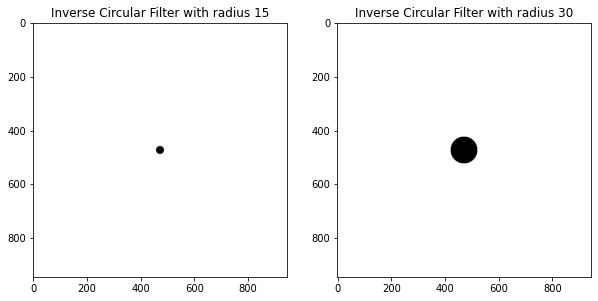

In [ ]:
fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols =2, figsize = (10,10))
ax1.imshow(inv_circ_filt1, cmap='gray')
ax1.set_title('Inverse Circular Filter with radius 15')
ax2.imshow(inv_circ_filt2, cmap='gray')
ax2.set_title('Inverse Circular Filter with radius 30')

In [ ]:
# Product of the two images will give the filtered output
filtered_spectrum1 = (inv_circ_filt1*np.fft.fftshift(fft_ct_image))
filtered_spectrum2 = (inv_circ_filt2*np.fft.fftshift(fft_ct_image))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Filtered Spectrum with filter radius 30')

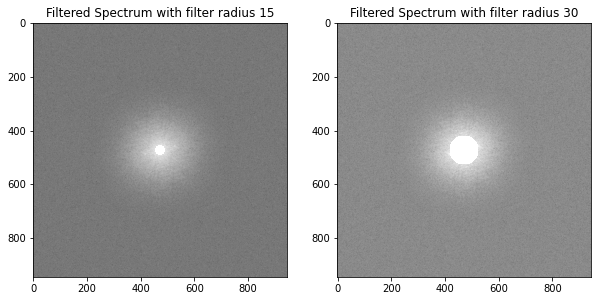

In [ ]:
fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols =2, figsize = (10,10))
ax1.imshow(20*np.log(np.abs(filtered_spectrum1)), cmap='gray')
ax1.set_title('Filtered Spectrum with filter radius 15')
ax2.imshow(20*np.log(np.abs(filtered_spectrum2)), cmap='gray')
ax2.set_title('Filtered Spectrum with filter radius 30')

In [ ]:
ifft_ct_image_hp1 = np.fft.ifft2(np.fft.ifftshift(filtered_spectrum1))
ifft_ct_image_hp2 = np.fft.ifft2(np.fft.ifftshift(filtered_spectrum2))

Text(0.5, 1.0, 'Image after filtering with filter radius 30')

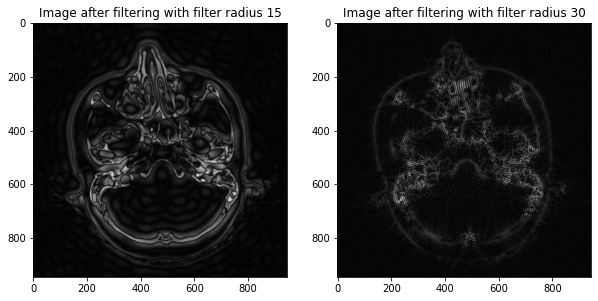

In [ ]:
fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols =2, figsize = (10,10))
ax1.imshow(np.abs(ifft_ct_image1), cmap='gray')
ax1.set_title('Image after filtering with filter radius 15')
ax2.imshow(np.abs(ifft_ct_image2), cmap='gray')
ax2.set_title('Image after filtering with filter radius 30')

Final Results after filtering 

Text(0.5, 1.0, 'Image after High Pass Filtering(30)')

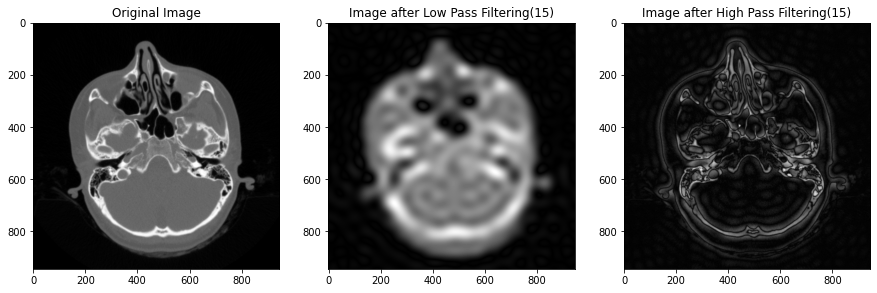

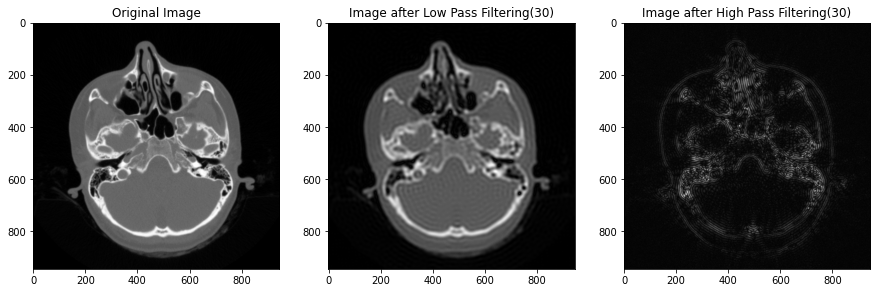

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows =1, ncols =3, figsize = (15,15))
fig.canvas.set_window_title('Plots after Low Pass and High Pass filtering')
ax1.imshow(ct, cmap='gray')
ax1.set_title('Original Image')
ax2.imshow(np.abs(ifft_ct_image_lp1), cmap='gray')
ax2.set_title('Image after Low Pass Filtering(15)')
ax3.imshow(np.abs(ifft_ct_image_hp1), cmap='gray')
ax3.set_title('Image after High Pass Filtering(15)')

fig, (ax1, ax2, ax3) = plt.subplots(nrows =1, ncols =3, figsize = (15,15))
ax1.imshow(ct, cmap='gray')
ax1.set_title('Original Image')
ax2.imshow(np.abs(ifft_ct_image_lp2), cmap='gray')
ax2.set_title('Image after Low Pass Filtering(30)')
ax3.imshow(np.abs(ifft_ct_image_hp2), cmap='gray')
ax3.set_title('Image after High Pass Filtering(30)')

>>>### Inferences

The high-pass filtering has led to highlighting of edges in the images, the higher the filter size the more low frequency componenets are retained in the filtered images. The high frequency component of the images are associated with the sharper features in the images. Thus after highpass filtering we tend to retain mostly edge related featuers in the image.



---
<h1><center>END


# Getting images for End Semester Evaluation

In [ ]:
import matplotlib.pyplot as plt
image1 = plt.imread('/content/complete_skull_predicted.png')
image2 = plt.imread('/content/predicted_skull.png')
image3 = plt.imread('/content/n1_implant_image.PNG')
image4 = plt.imread('/content/n2_implant_image.PNG')

(-0.5, 502.5, 401.5, -0.5)

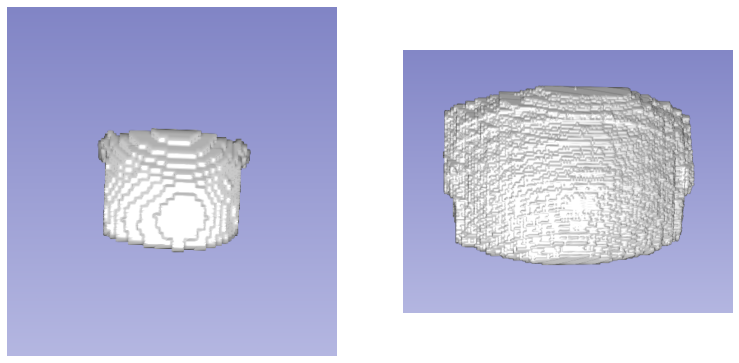

In [ ]:
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(13,13))
ax1.imshow(image3, cmap='gray')
ax1.axis('off')
ax2.imshow(image4, cmap='gray')
ax2.axis('off')

In [ ]:
im4 = plt.imread('/content/WhatsApp Image 2020-11-16 at 23.02.53 (1).jpeg')
im5 = plt.imread('/content/WhatsApp Image 2020-11-16 at 23.02.53.jpeg')
im6 = plt.imread('/content/WhatsApp Image 2020-11-16 at 23.02.54 (1).jpeg')
im7 = plt.imread('/content/WhatsApp Image 2020-11-16 at 23.02.54.jpeg')
im8 = plt.imread('/content/WhatsApp Image 2020-11-16 at 23.02.57 (1).jpeg')
im9 = plt.imread('/content/WhatsApp Image 2020-11-16 at 23.02.57.jpeg')

(-0.5, 773.5, 1031.5, -0.5)

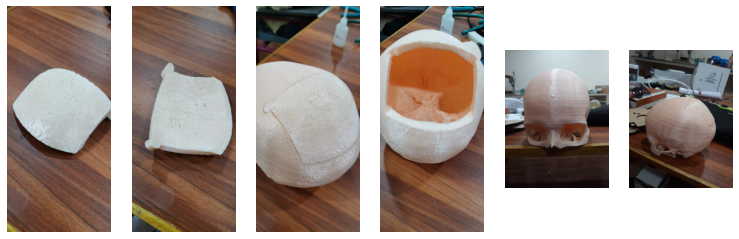

In [ ]:
fig,(ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(1,6, figsize=(13,13))
ax1.imshow(im4, cmap='gray')
ax1.axis('off')
ax2.imshow(im5, cmap='gray')
ax2.axis('off')
ax3.imshow(im6, cmap='gray')
ax3.axis('off')
ax4.imshow(im7, cmap='gray')
ax4.axis('off')
ax5.imshow(im8, cmap='gray')
ax5.axis('off')
ax6.imshow(im9, cmap='gray')
ax6.axis('off')